Task #5
=======

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
sns.set_theme()
import math

#_______________________________from task3______________________________________
def gen_normal(n):
    """Generates random sample [X1, X2,.. X_{n}] where Xi ~ N(0,1)"""
    eta = np.random.rand(2,n)
    r = -np.sqrt(-2*np.log(eta[0,:]))
    phi = 2*np.pi*eta[1,:]
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    return np.array([x,y])

def gen_cauchy(n,x0=0,gamma=1):
    """Generates random sample [X1, X2,.. X_{n}] where Xi ~ Cauchy(x0,gamma)"""
    return x0 + gamma*np.tan(np.pi*(np.random.rand(n) - 1/2))
#_______________________________________________________________________________

#5.1
----
for $\{X_i\} \sim \mathcal{N}(\mu,\sigma^2)$ test
* LLN i.e $\dfrac{S_n}{n} = \dfrac{\sum_{i=1}^n X_i}{n} \rightarrow \mu 
\text{ as } n \rightarrow \infty,$

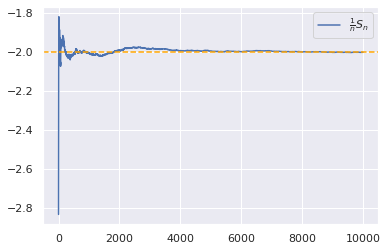

In [49]:
n,mu,sigma2 = 10000,-2,0.5
X = np.sqrt(sigma2)*gen_normal(n)[0,:] + mu

Sn = np.cumsum(X)
n = np.arange(1,n+1)
LLN = Sn/n
ax = sns.lineplot(x = n, y = LLN, label=r'$\frac{1}{n} S_n$')
ax.axhline(mu, ls='--', color='orange')

* CLT i.e $\dfrac{S_n - \mu n}{\sigma \sqrt{n}} \xrightarrow{d} \eta \sim 
\mathcal{N}(0,1) \text{ as } n \rightarrow \infty.$

<AxesSubplot:xlabel='Value', ylabel='Density'>

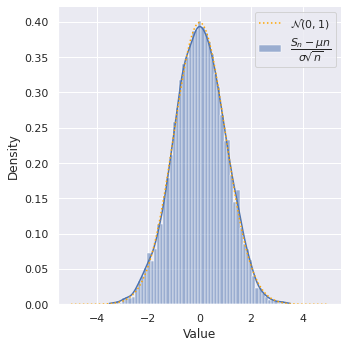

In [21]:
def gen_Sn(size,n,mu=0,sigma2=1):
    """Generates random sample [S1, S2,.. S_{size}] where Si -- sum of n 
    normally distributed random values"""
    X = np.sqrt(sigma2)*gen_normal(n*size)[0,:] + mu
    return np.sum(np.reshape(X,(size,n)),axis=1)

size,n,mu,sigma2 = 10000,1000,-2,0.5
data = (gen_Sn(size,n,mu,sigma2) - mu*n) / np.sqrt(sigma2*n)
graph = sns.displot({"Value": data}, x = "Value", stat="density",
                                kde=True, kde_kws={"bw_adjust": 1}, 
                                label=r'$\dfrac{S_n - \mu n}{\sigma \sqrt{n}}$')
sns.lineplot(x=np.linspace(-5, 5, 1000), y=sps.norm.pdf(np.linspace(-5, 5, 1000)), 
                            ls=':', color = "orange", label=r'$\mathcal{N}(0,1)$')

#5.2
----
With $\{X_i\} \sim \mathcal{N}(\mu,\sigma^2)$ given, compute confidence intervals for 
$\mu$ and $\sigma$.

Let $S = \sqrt{\frac{1}{n}\sum(X_i - \overline X)^2}$. CIs:
* $\overline X - \frac{y_{1-\alpha/2}S}{\sqrt{n-1}} < \mu <
		\overline X - \frac{y_{\alpha/2}S}{\sqrt{n-1}},$
* $\frac{\sqrt{n}S}{\sqrt{z_{1-\alpha/2}}} < \sigma < 
		\frac{\sqrt{n}S}{\sqrt{z_{\alpha/2}}}$
both at confidence level $1-\alpha$


In [92]:
n,mu,sigma2,alpha = 1000,-2,0.5,0.05

X = np.sqrt(sigma2)*gen_normal(n)[0,:] + mu
N = np.arange(1,n+1)
barX = np.cumsum(X) / N
S = np.sqrt( (1/N) * (np.cumsum(X-barX))**2 )
X,N,barX,S = X[1:], N[1:], barX[1:], S[1:] #remove 1st element


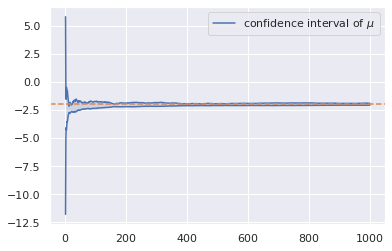

In [94]:
y_a2 = sps.t.ppf(alpha/2,N-1)
y_1a2 = -y_a2
mu1,mu2 = barX - y_1a2*S / np.sqrt(N-1),  barX - y_a2*S / np.sqrt(N-1)

graph = sns.lineplot(x = N, y = mu1, color=sns.color_palette()[0])
sns.lineplot(x = N, y = mu2, color=sns.color_palette()[0],
                                        label=r'confidence interval of $\mu$')
graph.fill_between(N, mu1, mu2, alpha=0.2)
graph.axhline(mu, ls='--', color=sns.color_palette()[1])

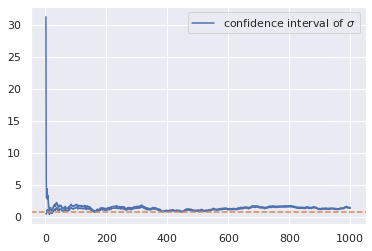

In [93]:
z_a2 = sps.chi2.ppf(alpha/2,N-1)
z_1a2 = sps.chi2.ppf(1-alpha/2,N-1)
s1,s2   =   np.sqrt(N)*S / np.sqrt(z_1a2), np.sqrt(N)*S / np.sqrt(z_a2)

graph = sns.lineplot(x = N, y = s1, color=sns.color_palette()[0])
sns.lineplot(x = N, y = s2, color=sns.color_palette()[0],
                                    label=r'confidence interval of $\sigma$')
graph.fill_between(N, s1, s2, alpha=0.2)
graph.axhline(np.sqrt(sigma2), ls='--', color=sns.color_palette()[1])

#5.3
----
$\{X_i\} \sim \mathrm{Cauchy}(a,b)$. Show $\dfrac{S_n}{n}$ behavior

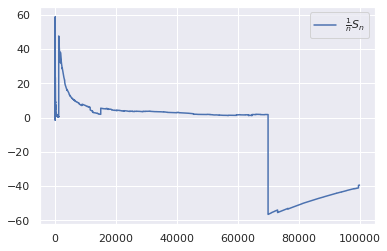

In [108]:
n,a,b = 100000,0,3

X = gen_cauchy(n,a,b)
Sn = np.cumsum(X)
n = np.arange(1,n+1)
barX = Sn/n
graph = sns.lineplot(x = n, y = barX, label=r'$\frac{1}{n} S_n$')